<a href="https://colab.research.google.com/github/Fatemekm98/Machine-Learning/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


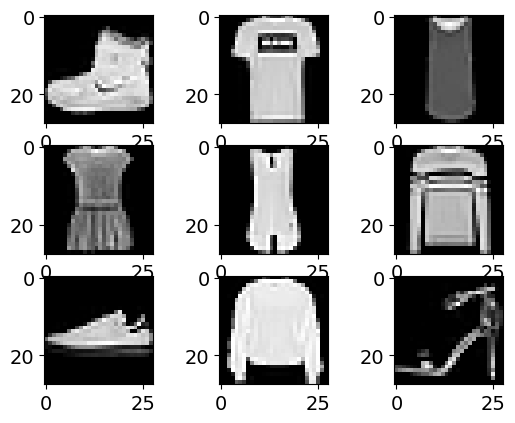

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
#normalize
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [ ]:
X_train_flattened = X_train_normalized.reshape((-1, 784))
X_test_flattened = X_test_normalized.reshape((-1, 784))


In [ ]:
#Logistic
model = LogisticRegression(solver='liblinear', C=0.001, multi_class='auto', random_state=0)
model.fit(X_train_flattened, Y_train)

LogisticRegression(C=0.001, random_state=0, solver='liblinear')

In [ ]:
# تخمین برچسب داده‌های تست با استفاده از مدل آموزش دیده شده
predictions = model.predict(X_train_flattened)
print("Predictions:", predictions)
# محاسبه دقت مدل
accuracy = model.score(X_train_flattened, Y_train)
print("Accuracy:", accuracy)

Predictions: [9 0 3 ... 3 0 5]
Accuracy: 0.8140166666666667


In [ ]:
# تخمین برچسب داده‌های تست با استفاده از مدل آموزش دیده شده
predictions = model.predict(X_test_flattened)
print("Predictions:", predictions)
# محاسبه دقت مدل
accuracy = model.score(X_test_flattened, Y_test)
print("Accuracy:", accuracy)

Predictions: [9 2 1 ... 8 1 5]
Accuracy: 0.8027


In [ ]:
#GridSearchCV
model = LogisticRegression()
tuned_parameters = {'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(model, tuned_parameters, cv = 10)

#trai model
clf.fit(X_train_flattened, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]})

In [ ]:
print(clf.best_params_)

{'C': 0.3}


In [ ]:
# تخمین برچسب داده‌های تست با استفاده از مدل آموزش دیده شده
predictions = clf.predict(X_test_flattened)
print("Predictions:", predictions)
# محاسبه دقت مدل
accuracy = clf.score(X_test_flattened, Y_test)
print("Accuracy:", accuracy)

Predictions: [9 2 1 ... 8 1 5]
Accuracy: 0.8436


In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.820 (+/-0.009) for {'C': 0.001}
0.852 (+/-0.010) for {'C': 0.01}
0.857 (+/-0.008) for {'C': 0.05}
0.857 (+/-0.006) for {'C': 0.1}
0.857 (+/-0.009) for {'C': 0.2}
0.857 (+/-0.009) for {'C': 0.3}


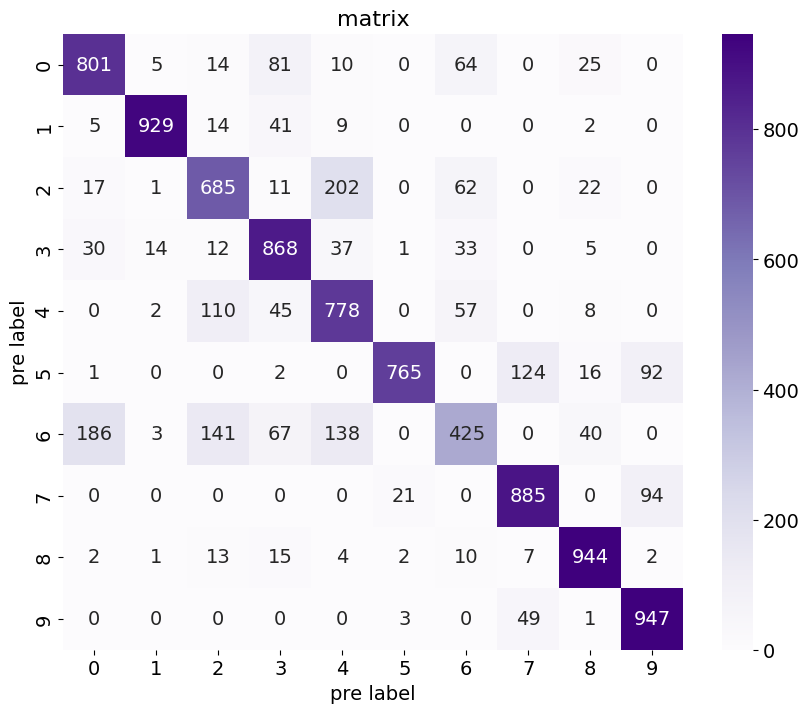

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot= True, cmap='Purples', fmt='g', xticklabels=[str(i) for i in range(10)], yticklabels =[str(i) for i in range(10)])
plt.xlabel('pre label', fontsize=14)
plt.ylabel('pre label', fontsize=14)
plt.title('matrix', fontsize=16)
plt.show()


In [ ]:
model = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_flattened, Y_train)

predictions = model.predict(X_test_flattened)
print("Predictions:", predictions)
# محاسبه دقت مدل
accuracy = model.score(X_test_flattened, Y_test)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Predictions: [9 2 1 ... 6 1 5]
Accuracy: 0.8364
